### Classification of MNIST Dataset with Convolution Neural Networks

Let's build a convolutional neural network (CNN) classifier to classify images of handwritten digits in the MNIST dataset.

The MNIST dataset contains 70,000 grayscale images of handwritten digits at a resolution of 28 by 28 pixels. The task is to take one of these images as input and predict the most likely digit contained in the image (along with a relative confidence in this prediction).

#### 1. Import Libraries

In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Images, plots, display, and visualization
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import seaborn as sns
import IPython

print("TensorFlow version ", tf.__version__)

TensorFlow version  1.12.0


In [3]:
%matplotlib inline
style.use('ggplot')

We have successfully imported all the packages and libraries. Now let's start by downloading the dataset first.

#### 2. Load the data

Now, we load the dataset. The images are 28x28 NumPy arrays, with pixel values ranging between 0 and 255. The labels are an array of integers, ranging from 0 to 9.

In [4]:
mnist = keras.datasets.mnist

"""Load the data"""
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() 

When we load the dataset. Loading the dataset returns four <i>NumPy</i> arrays:
- The train_images and train_labels array are the training set - the data the model uses to learn.
- The test_images and test_labels array are the testing set - the data against the model is tested.

In [5]:
"""Have a look on training set"""
train_images.shape

(60000, 28, 28)

We are having 60000 images in our training dataset with dimensions of size (28, 28).

In [6]:
train_labels.shape

(60000,)

We are having 60000 labels in our training dataset.

In [7]:
"""Have a look on testing set"""
test_images.shape

(10000, 28, 28)

We are having 10000 images in our testing dataset of dimensions (28, 28).

In [8]:
test_labels.shape

(10000,)

We are having 10000 lables in our testing dataset.

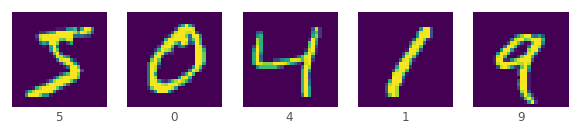

In [9]:
"""Show first new sample in the training dataset"""
plt.figure(figsize = (10, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i])
    plt.xlabel(train_labels[i])


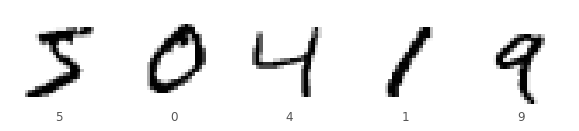

In [10]:
"""Show first new sample in the training dataset"""
plt.figure(figsize = (10, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])


<b>Let's look how our training dataset looks like:</b>

In [11]:
"""Look a sample"""
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

This is how our first training sample looks like <i>an array with multiple values having range from [0, 255].

In [12]:
"""Look of the shape of a sample"""
train_images[0].shape

(28, 28)

The shape of each sample is (28, 28).

#### 3. Feature Engineering

We scale the pixel values in a range of 0 to 1 before feeding to the neural network model. For this, we divide the values by 255. It's important that the training set and the testing set are preprocessed in the same way:

In [13]:
max_pixel = 255
train_images = train_images / max_pixel
test_images = test_images / max_pixel

In [14]:
"""Look at the normalized data"""
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

Now, all the pixels are in the range of 0 to 1.

#### 4. Build the model

Building the neural network requires configuring the layers of the model, then compiling the model. In many cases, this can be reduced to simply stacking together layers:

In [ ]:
model = keras.Sequential()